In [44]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.impute import KNNImputer
import windrose
import seaborn as sns
from scipy.interpolate import make_interp_spline

In [10]:
may = pd.read_csv('May.csv')
june = pd.read_csv('June.csv')
july = pd.read_csv('July.csv')

In [11]:
wind = pd.concat([may[135:],june,july])

In [12]:
wind.index = pd.to_datetime(wind[['year', 'month', 'day', 'hour', 'minute']])
wind_clean = wind[['windspeed', 'direction']].resample('H').mean().round(2)
wind_clean

,windspeed,direction
2022-05-13 12:00:00,1.46,68.00
2022-05-13 13:00:00,2.98,72.62
2022-05-13 14:00:00,5.81,71.18
2022-05-13 15:00:00,6.98,57.97
2022-05-13 16:00:00,6.23,56.73
...,...,...
2022-07-29 03:00:00,0.95,188.67
2022-07-29 04:00:00,0.69,264.97
2022-07-29 05:00:00,0.42,276.30
2022-07-29 06:00:00,0.73,258.35


In [13]:
wind_dropped = wind_clean.dropna(how='any',axis=0)
wind_dropped.to_csv('wind.csv')

In [14]:
bins = bins = np.linspace(0,360,9)+22.5
bins = np.insert(bins,0,0)
labels = ["N","NE","E","SE","S","SW","W","NW","N2"]

In [15]:
wind_dropped['wind direction'] = pd.cut(wind_dropped.direction, bins=bins, labels=labels, include_lowest=True)
wind_dropped['wind direction'].replace('N2','N', inplace=True)
wind_dropped.head()

<ipython-input-15-1ce3145cca57>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wind_dropped['wind direction'] = pd.cut(wind_dropped.direction, bins=bins, labels=labels, include_lowest=True)
C:\Users\Panos\anaconda3\lib\site-packages\pandas\core\series.py:4509: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().replace(


,windspeed,direction,wind direction
2022-05-13 12:00:00,1.46,68.00,E
2022-05-13 13:00:00,2.98,72.62,E
2022-05-13 14:00:00,5.81,71.18,E
2022-05-13 15:00:00,6.98,57.97,NE
2022-05-13 16:00:00,6.23,56.73,NE


In [16]:
freq = wind_dropped['wind direction'].value_counts()
wind_dropped.loc[:,'frequency'] = freq[wind_dropped['wind direction']].values / freq.sum()
wind_dropped

C:\Users\Panos\anaconda3\lib\site-packages\pandas\core\indexing.py:1597: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = value
C:\Users\Panos\anaconda3\lib\site-packages\pandas\core\indexing.py:1676: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)


,windspeed,direction,wind direction,frequency
2022-05-13 12:00:00,1.46,68.00,E,0.267949
2022-05-13 13:00:00,2.98,72.62,E,0.267949
2022-05-13 14:00:00,5.81,71.18,E,0.267949
2022-05-13 15:00:00,6.98,57.97,NE,0.150000
2022-05-13 16:00:00,6.23,56.73,NE,0.150000
...,...,...,...,...
2022-07-29 03:00:00,0.95,188.67,S,0.106410
2022-07-29 04:00:00,0.69,264.97,W,0.168590
2022-07-29 05:00:00,0.42,276.30,W,0.168590
2022-07-29 06:00:00,0.73,258.35,W,0.168590


In [58]:
wind_dropped.to_csv('wind_cardinal.csv')

In [51]:
typical_24 = wind_dropped['wind direction'].groupby(wind_dropped.index.hour).agg(pd.Series.mode)
typical_24

0     SW
1     SW
2      W
3     SW
4     SW
5     SW
6     SW
7     SW
8      E
9      E
10     E
11     E
12    NE
13     E
14     E
15     E
16    NE
17     E
18     E
19     E
20     E
21     W
22     W
23     W
Name: wind direction, dtype: object

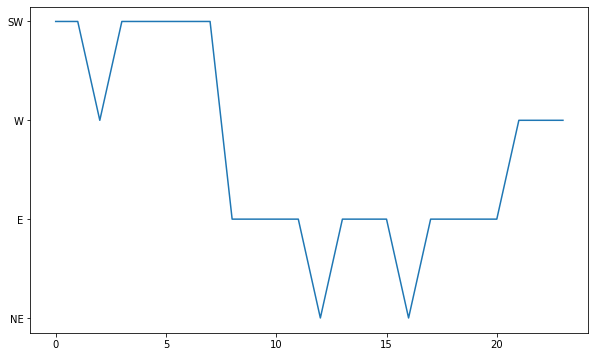

In [57]:
plt.figure(figsize=(10,6))
plt.plot(typical_24.index, typical_24.values)
plt.gca().invert_yaxis()
plt.xticks(np.arange(0,24,5))
plt.show()